In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [7]:
# batch_size, lr, num_epochs = 256, 0.1, 10
# loss = nn.CrossEntropyLoss(reduction='none')
# trainer = torch.optim.SGD(net.parameters(), lr=lr)

# train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [12]:
import matplotlib.pyplot as plt

def train_ch3_with_plot(net, train_iter, test_iter, loss, num_epochs, trainer):
    train_loss_list, train_acc_list, test_acc_list = [], [], []
    for epoch in range(num_epochs):
        net.train()
        total_loss, correct, total = 0.0, 0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).mean()
            trainer.zero_grad()
            l.backward()
            trainer.step()

            total_loss += l.item() * y.size(0)
            correct += (y_hat.argmax(dim=1) == y).sum().item()
            total += y.size(0)

        train_loss = total_loss / total
        train_acc = correct / total
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        net.eval()
        correct_test, total_test = 0, 0
        with torch.no_grad():
            for X, y in test_iter:
                y_hat = net(X)
                correct_test += (y_hat.argmax(dim=1) == y).sum().item()
                total_test += y.size(0)
        test_acc = correct_test / total_test
        test_acc_list.append(test_acc)

        print(f'Epoch {epoch + 1}, Loss {train_loss:.4f}, '
              f'Train Acc {train_acc:.3f}, Test Acc {test_acc:.3f}')

    # 画图
    epochs = list(range(1, num_epochs + 1))
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_list, 'r-', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_list, 'b-', label='Train Acc')
    plt.plot(epochs, test_acc_list, 'g-', label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1, Loss 0.3753, Train Acc 0.867, Test Acc 0.832
Epoch 2, Loss 0.3648, Train Acc 0.870, Test Acc 0.842
Epoch 3, Loss 0.3576, Train Acc 0.873, Test Acc 0.836
Epoch 4, Loss 0.3529, Train Acc 0.874, Test Acc 0.846
Epoch 5, Loss 0.3459, Train Acc 0.877, Test Acc 0.829
Epoch 6, Loss 0.3402, Train Acc 0.879, Test Acc 0.854
Epoch 7, Loss 0.3344, Train Acc 0.881, Test Acc 0.855
Epoch 8, Loss 0.3293, Train Acc 0.882, Test Acc 0.861
Epoch 9, Loss 0.3248, Train Acc 0.885, Test Acc 0.868
Epoch 10, Loss 0.3182, Train Acc 0.887, Test Acc 0.861


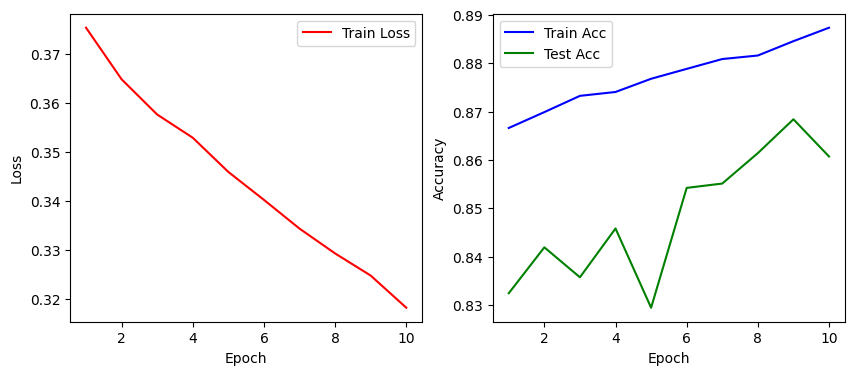

In [13]:
train_ch3_with_plot(net, train_iter, test_iter, loss, num_epochs, trainer)